In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
titanic_df = pd.read_csv('datasets/train.csv')


In [6]:
titanic_df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [9]:
    titanic_df.shape

(891, 12)

In [10]:
titanic_df.drop(['PassengerId','Name','Ticket','Cabin'], 'columns', inplace=True)

In [11]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
type(titanic_df)

pandas.core.frame.DataFrame

In [14]:
titanic_df [titanic_df.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

In [15]:
titanic_df = titanic_df.dropna()

In [16]:
titanic_df [titanic_df.isnull().any(axis=1)].count()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Text(0, 0.5, 'Survived')

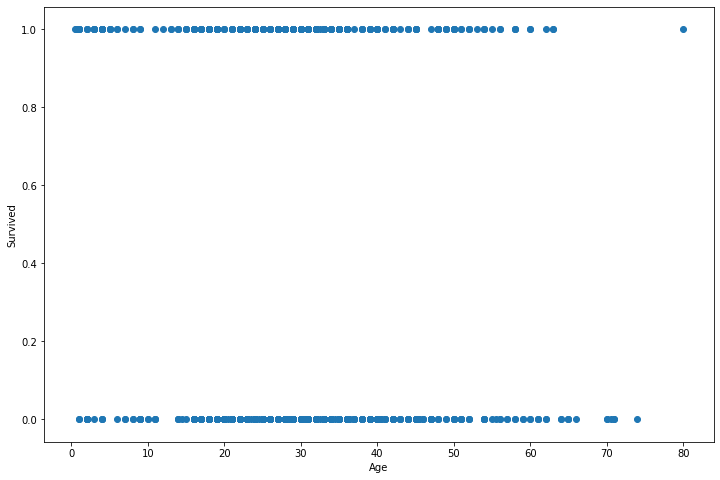

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(titanic_df['Age'], titanic_df['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')

In [22]:
pd.crosstab(titanic_df['Sex'], titanic_df['Survived'])

SyntaxError: invalid syntax (<ipython-input-22-c7f8959a86ca>, line 1)

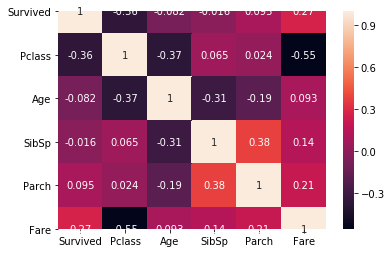

In [26]:
sns.heatmap(titanic_data_corr,annot=True)

In [28]:
titanic_data_corr = titanic_df.corr()
titanic_data_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


In [32]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
titanic_df['Sex'] = label_encoding.fit_transform(titanic_df['Sex'].astype(str))
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [35]:
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [36]:
titanic_df = titanic_df.sample(frac=1).reset_index(drop=True) 
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,29.0,1,0,7.0458,0,0,1
1,0,3,1,4.0,4,2,31.2750,0,0,1
2,1,2,0,7.0,0,2,26.2500,0,0,1
3,1,3,0,5.0,0,0,12.4750,0,0,1
4,1,2,0,19.0,0,0,26.0000,0,0,1


In [37]:
titanic_df.to_csv('datasets/training_processed.csv')
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,29.0,1,0,7.0458,0,0,1
1,0,3,1,4.0,4,2,31.2750,0,0,1
2,1,2,0,7.0,0,2,26.2500,0,0,1
3,1,3,0,5.0,0,0,12.4750,0,0,1
4,1,2,0,19.0,0,0,26.0000,0,0,1


In [38]:
titanic_df = pd.read_csv('datasets/training_processed.csv')
titanic_df.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,0,3,1,29.0,1,0,7.0458,0,0,1
1,1,0,3,1,4.0,4,2,31.2750,0,0,1
2,2,1,2,0,7.0,0,2,26.2500,0,0,1
3,3,1,3,0,5.0,0,0,12.4750,0,0,1
4,4,1,2,0,19.0,0,0,26.0000,0,0,1


In [39]:
from sklearn.model_selection import train_test_split
X=titanic_df.drop('Survived',axis=1)
Y=titanic_df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [43]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty = 'l2' , C=1.0 , solver='liblinear').fit(x_train,y_train)

In [44]:
y_pred = logistic_model.predict(x_test)

In [45]:
pred_results = pd.DataFrame ( {'y_test' : y_test, 'y_pred' : y_pred})
pred_results.head()

,y_test,y_pred
75,1,1
563,0,0
170,1,0
120,0,0
515,1,0


In [46]:
titanic_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
titanic_crosstab

y_test,0,1
y_pred,,
0,71,19
1,12,41


In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [49]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print ( "accuracy score : " , acc)
print ( "precision score : " , prec)
print ( "recall score : " , recall)

accuracy score :  0.7832167832167832
precision score :  0.7735849056603774
recall score :  0.6833333333333333
